In [1]:
import tempfile
import urllib.request
import zipfile
from pathlib import Path
from random import Random

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
random = Random(42)  # Para reproducibilidad; cambiar para obtener distintos resultados

# Introducción al procesamiento de imágenes

## 1. Imágenes digitales y su representación

Una imagen digital es una representación bidimensional de una escena visual.
Existen dos tipos de representaciones digitales de imágenes: **raster** y
**vectorial**.

- **Raster**: Las imágenes raster son representadas como una matriz de píxeles.
  Cada píxel tiene un valor que representa el color de la imagen en esa
  posición. Las imágenes raster son las más comunes en aplicaciones de
  procesamiento de imágenes.

- **Vectorial**: Las imágenes vectoriales son representadas como una colección
  de objetos geométricos, como líneas, círculos y polígonos. Las imágenes
  vectoriales son comúnmente usadas en aplicaciones de diseño gráfico.

### 1.1 Los modelos de color

El modelo de color es un método para representar colores en una imagen.
Cuando haces zoom a un monitor de computadora, verás que la imagen está
compuesta por pequeños puntos de colores; a su vez, cada uno de estos puntos
está compuesto por tres diodos emisores de luz (LED) de color rojo, verde y
azul, que son los colores primarios de la luz (o *additivos*).
A este modelo de color se le conoce como **RGB** (por sus siglas en inglés:
*Red*, *Green* y *Blue*).

<figure>
    <img src="img/monitor.jpg"
         alt="Zoom a monitor de computadora.">
    <figcaption><strong>Figura 1.</strong>
    Zoom al monitor de la computadora del autor.
    La imagen muestra la punta del cursor.</figcaption>
</figure>

En el modelo RGB, cada color es una tríada de números $(r, g, b)$, donde $r$,
$g$ y $b$ son los valores de intensidad de los colores rojo, verde y azul 
respectivamente.
Entre más alto sea el valor de un color, más brillante e intenso será en la
imagen.
Estos valores usualmente ocupan 1 byte cada uno, por lo que pueden tomar
valores entre 0 y 255.
Así, por ejemplo, el rojo puro se representa como $(255, 0, 0)$, el gris
medio como $(128, 128, 128)$ y el blanco como $(255, 255, 255)$.
En los sitios web, los colores se representan en hexadecimal con RGB, de manera
que ocupan 6 dígitos hexadecimales, dos para cada componente; por ejemplo, el
rojo `#FF0000`, el gris medio `#808080` y el blanco `#FFFFFF`.

A continuación mostramos un widget de selección de color que nos permite
explorar el modelo RGB y otros modelos más.

In [3]:
# NOTA: Necesitas correr este notebook interactivamente para ver el widget.
widgets.ColorPicker()

ColorPicker(value='black')

Si haces clic en el las flechas a la derecha de "RGB", podrás seleccionar
el modelo *HSL*.
Este modelo representa los colores como una tríada de números $(h, s, l)$,
donde
- $h$ es un ángulo ($0^\circ$ a $360^\circ$) que representa el tono del
  color (los colores están organizados en un disco arcoíris),
- $s$ es la saturación o pureza del color (0% a 100%), y
- $l$ es la luminosidad (la cantidad de luz que refleja el color).

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Color_solid_comparison_hsl_hsv_rgb_cone_sphere_cube_cylinder.png"
         alt="Modelos de color RGB, HSL y HSV."
         style="height: 400px;">
    <figcaption><strong>Figura 2.</strong>
    Modelos de color RGB, HSL y HSV. Imagen de <a href="https://commons.wikimedia.org/wiki/File:Color_solid_comparison_hsl_hsv_rgb_cone_sphere_cube_cylinder.png">SharkD</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons.
    </figcaption>
</figure>

### 1.2 Imágenes vectoriales

Dado que casi todo el procesamiento de imágenes se realiza sobre imágenes
raster, no se profundizará en las imágenes vectoriales.
Sin embargo, es importante mencionar que las imágenes vectoriales tienen
ventajas sobre las imágenes raster, como la escalabilidad y la facilidad para
realizar modificaciones.
En la web es común encontrar imágenes vectoriales en el formato estándar **SVG**
(*Scalable Vector Graphics*), basado en XML.

Por ejemplo, el siguiente código crea un pino con tres triángulos y un
rectángulo.
Nótese el uso de colores en el atributo `fill` y el uso de coordenadas
relativas al centro del lienzo en el atributo `viewBox`.

```xml
<svg width="200" height="200" viewBox="-100 -100 200 200">
  <polygon points="0,0 80,120 -80,120" fill="#234236" />
  <polygon points="0,-40 60,60 -60,60" fill="#0C5C4C" />
  <polygon points="0,-80 40,0 -40,0" fill="#38755B" />
  <rect x="-20" y="120" width="40" height="30" fill="brown" />
</svg>
```

<svg width="200" height="200" viewBox="-100 -100 200 200">
  <polygon points="0,0 80,120 -80,120" fill="#234236" />
  <polygon points="0,-40 60,60 -60,60" fill="#0C5C4C" />
  <polygon points="0,-80 40,0 -40,0" fill="#38755B" />
  <rect x="-20" y="120" width="40" height="30" fill="brown" />
</svg>

En [este enlace](https://youtu.be/kBT90nwUb_o) puedes ver un video tutorial
sobre cómo crear imágenes vectoriales en SVG usando el editor de código.
En la práctica, es más común usar un editor gráfico como
[Inkscape](https://inkscape.org/), con el que puedes crear imágenes vectoriales
[bastante complejas](https://youtu.be/1U4hVbvRr_g).
Estoy seguro de que encontrarás útil aprender a usar Inkscape, ya que es un
programa de código abierto que te permitirá ilustrar tus proyectos de
investigación, presentaciones y publicaciones.

### 1.3 Modelo Raster: La matriz de píxeles como imagen

In [4]:
# Generando una imagen a partir de funciones matemáticas
ticks = np.linspace(-3, 3, 96)
ticks

array([-3.        , -2.93684211, -2.87368421, -2.81052632, -2.74736842,
       -2.68421053, -2.62105263, -2.55789474, -2.49473684, -2.43157895,
       -2.36842105, -2.30526316, -2.24210526, -2.17894737, -2.11578947,
       -2.05263158, -1.98947368, -1.92631579, -1.86315789, -1.8       ,
       -1.73684211, -1.67368421, -1.61052632, -1.54736842, -1.48421053,
       -1.42105263, -1.35789474, -1.29473684, -1.23157895, -1.16842105,
       -1.10526316, -1.04210526, -0.97894737, -0.91578947, -0.85263158,
       -0.78947368, -0.72631579, -0.66315789, -0.6       , -0.53684211,
       -0.47368421, -0.41052632, -0.34736842, -0.28421053, -0.22105263,
       -0.15789474, -0.09473684, -0.03157895,  0.03157895,  0.09473684,
        0.15789474,  0.22105263,  0.28421053,  0.34736842,  0.41052632,
        0.47368421,  0.53684211,  0.6       ,  0.66315789,  0.72631579,
        0.78947368,  0.85263158,  0.91578947,  0.97894737,  1.04210526,
        1.10526316,  1.16842105,  1.23157895,  1.29473684,  1.35

In [5]:
x, y = np.meshgrid(ticks, ticks)
print(x)  # Coordenadas x de cada punto
print(y)  # Coordenadas y de cada punto

[[-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 ...
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]]
[[-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-2.93684211 -2.93684211 -2.93684211 ... -2.93684211 -2.93684211
  -2.93684211]
 [-2.87368421 -2.87368421 -2.87368421 ... -2.87368421 -2.87368421
  -2.87368421]
 ...
 [ 2.87368421  2.87368421  2.87368421 ...  2.87368421  2.87368421
   2.87368421]
 [ 2.93684211  2.93684211  2.93684211 ...  2.93684211  2.93684211
   2.93684211]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]]


In [6]:
# Calculamos la matriz z como función de x e y
z = (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2) - y**2)
z

array([[-4.07401958e-06, -5.38469190e-06, -7.05339575e-06, ...,
         5.39027911e-06,  4.23244631e-06,  3.28206063e-06],
       [-5.89042094e-06, -7.78052792e-06, -1.01845115e-05, ...,
         7.92017626e-06,  6.21174420e-06,  4.81216790e-06],
       [-8.45090521e-06, -1.11557585e-05, -1.45925999e-05, ...,
         1.15391621e-05,  9.04026634e-06,  6.99688971e-06],
       ...,
       [-6.93292369e-06, -8.94720019e-06, -1.14048332e-05, ...,
         1.47269288e-05,  1.12488247e-05,  8.51487124e-06],
       [-4.76785076e-06, -6.14726582e-06, -7.82711011e-06, ...,
         1.02775777e-05,  7.84500630e-06,  5.93473808e-06],
       [-3.25160068e-06, -4.18812917e-06, -5.32631308e-06, ...,
         7.11736177e-06,  5.42900904e-06,  4.10447954e-06]])

In [7]:
print(f"z es una matriz de {z.shape} elementos de tipo {z.dtype}")
print(
    f"z tiene valores {z.mean():.3} ± {z.std():.3} "
    f"en el rango [{z.min():.3}, {z.max():.3}]"
)
print("Paletas disponibles:", plt.colormaps())

z es una matriz de (96, 96) elementos de tipo float64
z tiene valores 0.0855 ± 0.278 en el rango [-0.685, 1.06]
Paletas disponibles: ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays'

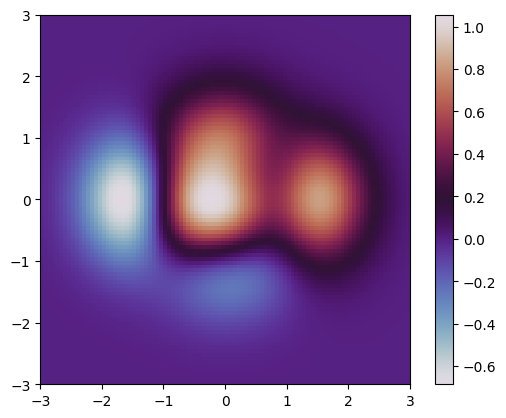

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(z, cmap="twilight", origin="lower", extent=[-3, 3, -3, 3])
fig.colorbar(im, ax=ax)

Esta gráfica de función ya tiene una representación como imagen digital, sin
embargo, las imágenes digitales suelen tener valores enteros entre 0 y 255.
En nuestro caso, la imagen tiene un único valor de intensidad para cada píxel,
por lo que es una imagen en escala de grises.

In [9]:
# Obtener un mapa de colores "magma"
cmap = plt.get_cmap("magma")
print(type(cmap))

# Observamos unos cuantos valores de colores:
colores = cmap([0, 0.25, 0.5, 0.75, 1])
print("Los colores que produce el mapa 'magma' están en el espacio RGBA de 0 a 1:")
print(colores)

<class 'matplotlib.colors.ListedColormap'>
Los colores que produce el mapa 'magma' están en el espacio RGBA de 0 a 1:
[[1.46200e-03 4.66000e-04 1.38660e-02 1.00000e+00]
 [3.16654e-01 7.16900e-02 4.85380e-01 1.00000e+00]
 [7.16387e-01 2.14982e-01 4.75290e-01 1.00000e+00]
 [9.86700e-01 5.35582e-01 3.82210e-01 1.00000e+00]
 [9.87053e-01 9.91438e-01 7.49504e-01 1.00000e+00]]


In [10]:
max_z = z.max()
print(f"El valor máximo de z es {max_z}")
min_z = z.min()
print(f"El valor mínimo de z es {min_z}")

El valor máximo de z es 1.0560394502327253
El valor mínimo de z es -0.68540810344194


In [11]:
# Normalizamos z
z_norm = (z - min_z) / (max_z - min_z)
print(f"z_norm tiene valores {z_norm.mean():.3} ± {z_norm.std():.3} en el rango [0, 1]")
print(f"El valor máximo de z_norm es {z_norm.max()}")
print(f"El valor mínimo de z_norm es {z_norm.min()}")

z_norm tiene valores 0.443 ± 0.16 en el rango [0, 1]
El valor máximo de z_norm es 1.0
El valor mínimo de z_norm es 0.0


In [12]:
# Aplicar el mapa de colores a la matriz z normalizada
z_color = cmap(z_norm)[:, :, :3]
print(f"z_color es una matriz de {z_color.shape} elementos de tipo {z_color.dtype}")
print("La entrada (0, 0) de z_color es", z_color[0, 0])

z_color es una matriz de (96, 96, 3) elementos de tipo float64
La entrada (0, 0) de z_color es [0.537755 0.156894 0.506551]


In [13]:
# Renormalizar la matriz z para que sus valores estén entre 0 y 255 (enteros de 8 bits)
z_color = (z_color * 255 + 0.5).astype(np.uint8)
print(f"z_color es una matriz de {z_color.shape} elementos de tipo {z_color.dtype}")
print("La entrada (0, 0) de z_color es", z_color[0, 0])

z_color es una matriz de (96, 96, 3) elementos de tipo uint8
La entrada (0, 0) de z_color es [137  40 129]


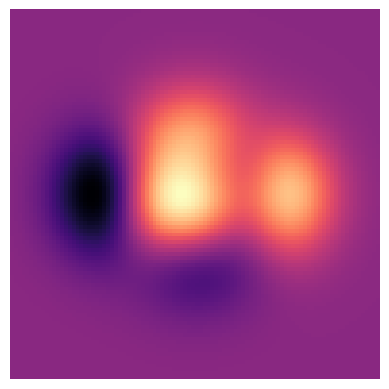

In [14]:
# Mostramos la imagen rasterizada
fig, ax = plt.subplots()
ax.imshow(z_color, origin="lower")

# Ocultar los ejes
limites = ax.axis("off")

#### Bases de datos de imágenes

En internet puedes encontrar muchas bases de datos de imágenes que puedes usar
para tus proyectos de investigación y educación.
Existen, sin embargo, algunas restricciones en el uso de estas imágenes.
Por ejemplo, algunas bases de datos requieren que se cite la fuente de las
imágenes, otras no permiten el uso comercial, y otras requieren que se
compartan los resultados de la investigación.

El Instituto de Procesamiento de Señales e Imágenes de la Universidad California
del Sur (**USC-SIPI**)  ha creado una base de datos de imágenes digitales con
el propósito de facilitar la investigación en el área.
Se puede acceder a la base de datos en el siguiente enlace:
https://sipi.usc.edu/database/

In [15]:
def descargar_sipi(volumen: str, destino: Path = Path("sipi")) -> None:
    """Descarga un volumen de la base de datos miscelánea de la USC-SIPI."""
    url = f"https://sipi.usc.edu/database/{volumen}.zip"
    assert volumen in ["textures", "aerials", "misc", "sequences"]

    if (destino / volumen).exists():
        print(f"El volumen {volumen} ya existe en el directorio sipi.")
        return

    with tempfile.TemporaryFile() as temp:
        # Usamos un archivo temporal para la descarga
        print(f"Descargando {url}...")
        with urllib.request.urlopen(url) as response:
            temp.write(response.read())

        temp.seek(0)  # Reiniciar el puntero del archivo para leerlo

        with zipfile.ZipFile(temp) as z:
            print(f"Descomprimiendo {volumen}.zip...")
            z.extractall(destino)

    print(f"Volumen {volumen} descargado y descomprimido en {destino}.")


# Descargamos la base de datos miscelánea de la USC-SIPI
descargar_sipi("misc")

El volumen misc ya existe en el directorio sipi.


In [16]:
archivos = list(Path("sipi/misc").iterdir())
print(f"Hay {len(archivos)} imágenes en la base de datos miscelánea.")

Hay 39 imágenes en la base de datos miscelánea.


Mostrando house.tiff...
La imagen es un arreglo de tipo uint8 y de forma (512, 512, 3).
En promedio, sus valores son 155.29 ± 54.85 en el rango [0, 255].
La imagen es a color.


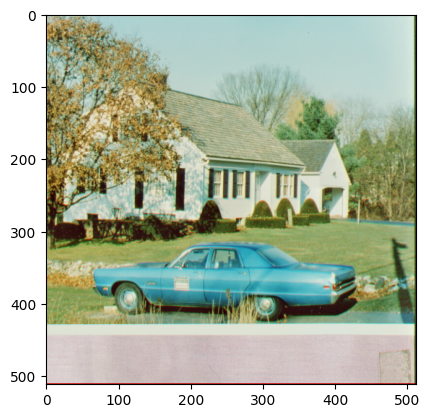

In [17]:
archivo_imagen = random.choice(archivos)
print(f"Mostrando {archivo_imagen.name}...")
imagen = plt.imread(archivo_imagen)  # Aquí se lee la imagen
print(f"La imagen es un arreglo de tipo {imagen.dtype} y de forma {imagen.shape}.")
print(
    f"En promedio, sus valores son {imagen.mean():.2f} ± {imagen.std():.2f} "
    f"en el rango [{imagen.min()}, {imagen.max()}]."
)

# Determinar si la imagen es a color o en escala de grises
a_color = imagen.ndim == 3
if a_color:
    print(f"La imagen es a color.")
else:
    print(f"La imagen es en escala de grises.")

# Mostrar la imagen
fig, ax = plt.subplots()
if a_color:
    img = ax.imshow(imagen)
else:
    img = ax.imshow(imagen, cmap="twilight")

## 1.2. Uso de Scikit-Image y NumPy para el procesamiento de imágenes

Scikit-Image es una biblioteca de Python que provee una colección de algoritmos
para el procesamiento de imágenes.
Es parte del ecosistema de Scipy y es de código abierto.

In [18]:
import skimage as ski

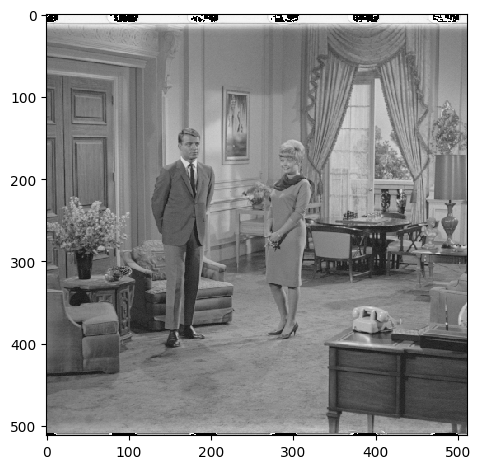

In [19]:
sipi_dir = Path("sipi")
archivo_imagen = sipi_dir / "misc" / "5.2.08.tiff"

# Cargar y mostrar una imagen con Scikit-Image
img = ski.io.imread(archivo_imagen)
ski.io.imshow(img)

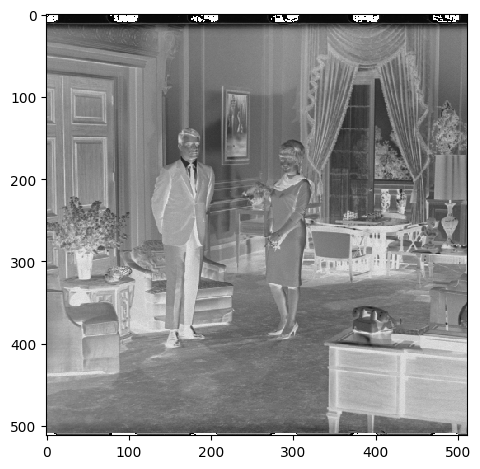

In [20]:
# Para calcular el negativo de la imagen, restamos cada valor de 255
img = ski.io.imread(sipi_dir / "misc" / "5.2.08.tiff"
)
img_neg = 255 - img
ski.io.imshow(img_neg)

### Uso de índices de Numpy en la manipulación de imágenes

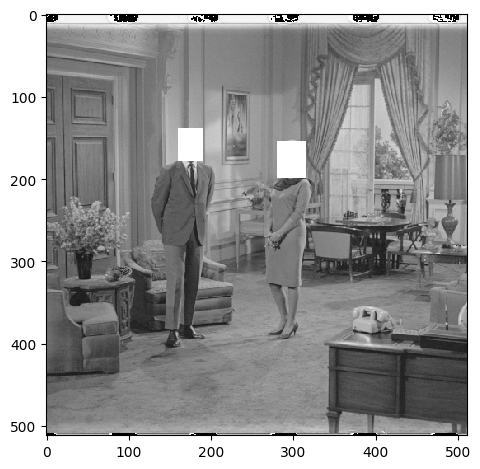

In [21]:
img[140:180, 160:190] = 255  # Colocar un rectángulo blanco en la imagen
img[155:200, 280:315] = 255  # ... y otro más
ski.io.imshow(img)

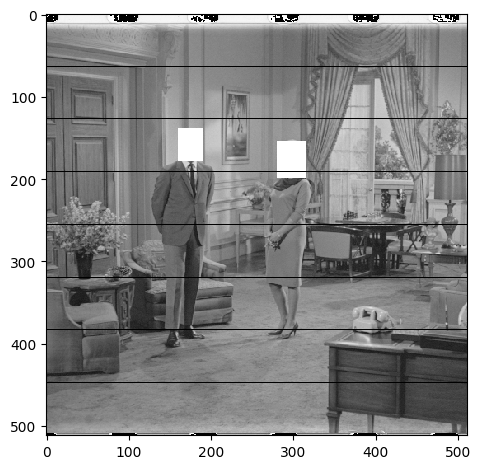

In [22]:
n_renglones = img.shape[0]
img[np.arange(n_renglones) % 64 == 0, :] = 0
ski.io.imshow(img)

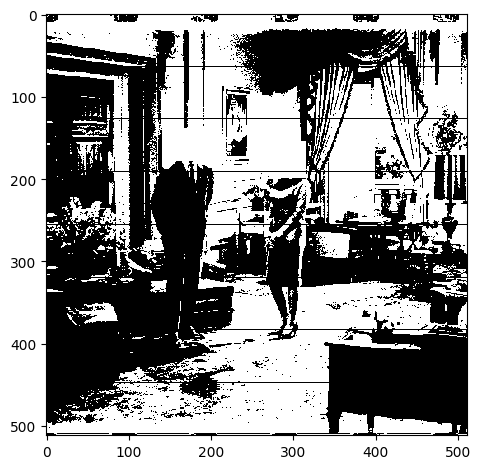

In [23]:
mascara = img > 128
ski.io.imshow(mascara)

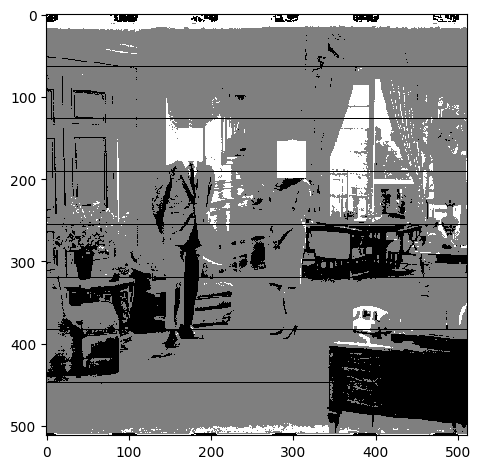

In [24]:
img[img < 85] = 0
img[(img >= 85) & (img <= 170)] = 127
img[img > 170] = 255
ski.io.imshow(img)

### Uso básico de NumPy para manipular imágenes a color

La imagen es un arreglo de tipo uint8 y de forma (512, 512, 3).


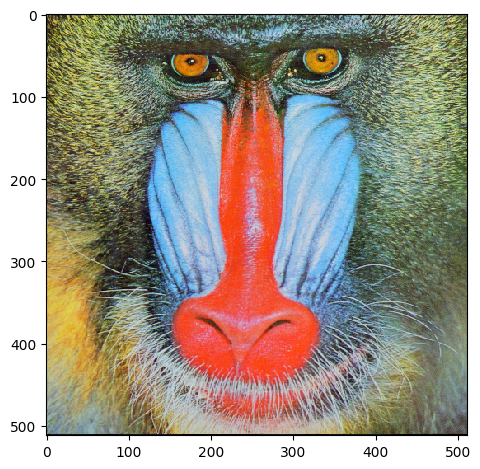

In [25]:
archivo_imagen = sipi_dir / "misc/4.2.03.tiff"
img = ski.io.imread(archivo_imagen)
print(f"La imagen es un arreglo de tipo {img.dtype} y de forma {img.shape}.")
ski.io.imshow(img)

Text(0.5, 1.0, 'Imagen compuesta')

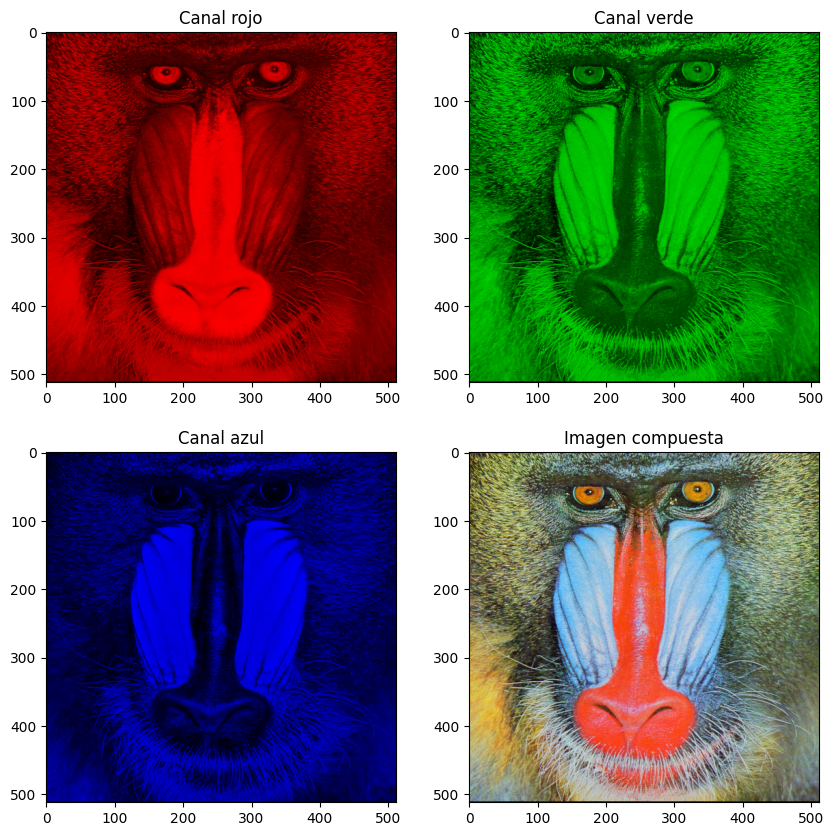

In [26]:
# Descomponer la imagen en sus canales de color
imgs = (img.copy(), img.copy(), img.copy())
for i in range(3):
    complemento = [k for k in range(3) if k != i]
    imgs[i][:, :, complemento] = 0  # Apagar los otros dos canales

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(imgs[0])
ax[0, 0].set_title("Canal rojo")
ax[0, 1].imshow(imgs[1])
ax[0, 1].set_title("Canal verde")
ax[1, 0].imshow(imgs[2])
ax[1, 0].set_title("Canal azul")
ax[1, 1].imshow(img)
ax[1, 1].set_title("Imagen compuesta")


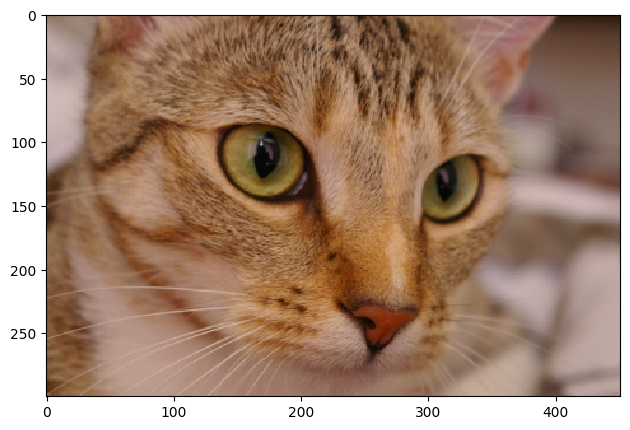

In [27]:
# Scikit-Image también cuenta con imágenes de prueba como esta:
img = ski.data.chelsea()
ski.io.imshow(img)

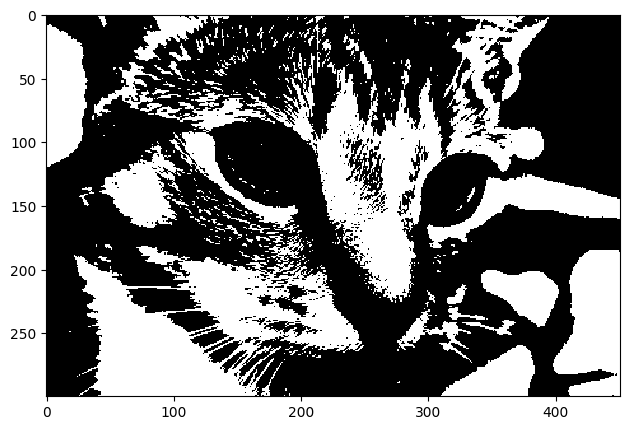

In [28]:
# Seleccionar los puntos con mayor canal rojo
mascara = img[:, :, 0] > 160
ski.io.imshow(mascara)

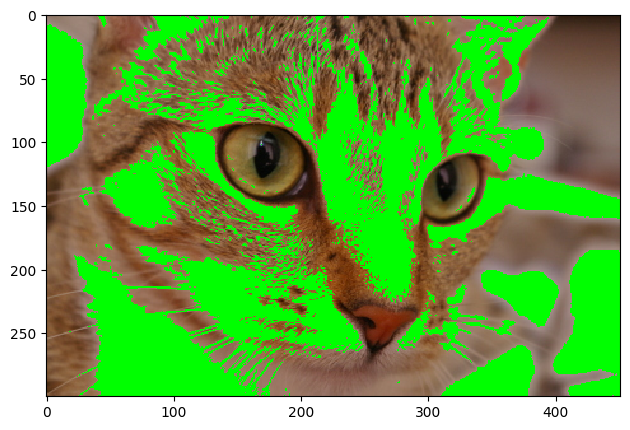

In [29]:
# Cambiar el color de los puntos seleccionados a verde
img[mascara] = [0, 255, 0]
ski.io.imshow(img)

A continuación veamos cómo manipular una imagen a color convirtiénola primero
a otro modelo de color como es HSV.

In [30]:
# Cambiar una imagen a HSV
img = ski.data.chelsea()
img_hsv = ski.color.rgb2hsv(img)
print(
    "La imagen en el espacio de color HSV tiene la forma "
    f"{img_hsv.shape} y tipo {img_hsv.dtype}."
)
print("Los valores de la imagen tienen la siguiente distribución:")
h, s, v = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]
print(f"H: {h.mean():.3} ± {h.std():.3} en el rango [{h.min():3}, {h.max():.3}]")
print(f"S: {s.mean():.3} ± {s.std():.3} en el rango [{s.min():.3}, {s.max():.3}]")
print(f"V: {v.mean():.3} ± {v.std():.3} en el rango [{v.min():.3}, {v.max():.3}]")

La imagen en el espacio de color HSV tiene la forma (300, 451, 3) y tipo float64.
Los valores de la imagen tienen la siguiente distribución:
H: 0.0749 ± 0.102 en el rango [0.0, 0.997]
S: 0.432 ± 0.174 en el rango [0.0, 1.0]
V: 0.579 ± 0.126 en el rango [0.0157, 0.906]


Observa que todos los valores HSV están normalizados de 0 a 1.
Esto significa que $h = 0.5$ es el ángulo de $180^\circ$, y es el mismo que
$h = 1.5$.

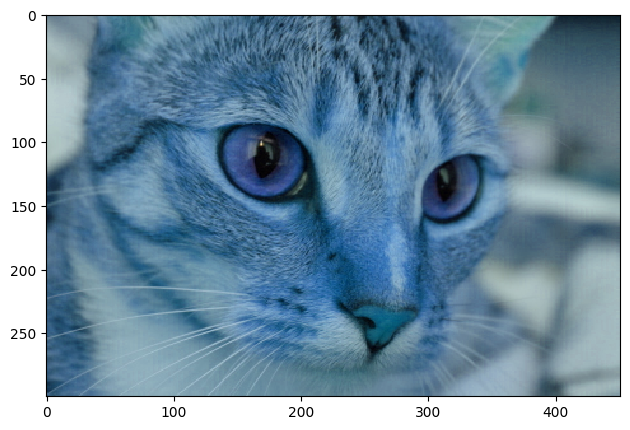

In [31]:
# Para cambiar el tono de la imagen, sumamos 0.5 al canal H y tomamos el módulo 1
# para renormalizarlo a valores entre 0 y 1.
img_hsv[:, :, 0] = (img_hsv[:, :, 0] + 0.5) % 1
img_nueva = ski.color.hsv2rgb(img_hsv)
ski.io.imshow(img_nueva)

## 1.3 Ajuste de imágenes con Scikit-Image

Scikit-Image contiene varias rutinas para ajustar imágenes.